In [1]:
#Pull API data to get daily COVID19 numbers
import numpy as np
import pandas as pd
import requests
import json

url = "https://api.apify.com/v2/key-value-stores/KWLojgM5r1JmMW4b4/records/LATEST?disableRedirect=true/"
JSONContent = requests.get(url).json()
content = json.dumps(JSONContent, indent = 4, sort_keys=True)

#UK Cases
print("UK Total Cases:",JSONContent['infected'])
print("UK Daily Confirmed:",JSONContent['dailyConfirmed'])
print("UK deceased:",JSONContent['deceased'])

#England
print("\nEngland Cases Confirmed:",JSONContent['englandConfirmed'])
print("England Deceased:",JSONContent['englandDeceased'])

#Scotland
print("\nScotland Cases Confirmed:",JSONContent['scotlandConfirmed'])
print("Scotland Deceased:",JSONContent['scotlandDeceased'])

#Wales
print("\nWales Cases Confirmed:",JSONContent['walesConfirmed'])
print("Wales Deceased:",JSONContent['walesDeceased'])

#NI
print("\nNorthen Ireland Cases Confirmed:",JSONContent['northenIrelandConfirmed'])
print("Northen Ireland Deceased:",JSONContent['northenIrelandDeceased'])


UK Total Cases: 279856
UK Daily Confirmed: 1871
UK deceased: 39728

England Cases Confirmed: 153376
England Deceased: 35456

Scotland Cases Confirmed: 15504
Scotland Deceased: 2375

Wales Cases Confirmed: 14203
Wales Deceased: 1371

Northen Ireland Cases Confirmed: 4740
Northen Ireland Deceased: 526


In [2]:
#Import excel file and show as a Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./monthly_milk_production.csv', sep=',', parse_dates=['Date'], index_col='Date')

df = pd.read_excel('/home/oddbod30/Files/COVID19.xlsx', sheet_name='UK Cases')

print((df).to_markdown())



|     | Date                |   Daily Cases |   Cumulative Cases |   7 Day Average |
|----:|:--------------------|--------------:|-------------------:|----------------:|
|   0 | 2020-01-31 00:00:00 |             2 |                  2 |      nan        |
|   1 | 2020-02-01 00:00:00 |             0 |                  2 |      nan        |
|   2 | 2020-02-02 00:00:00 |             0 |                  2 |      nan        |
|   3 | 2020-02-03 00:00:00 |             0 |                  2 |      nan        |
|   4 | 2020-02-04 00:00:00 |             0 |                  2 |      nan        |
|   5 | 2020-02-05 00:00:00 |             0 |                  2 |      nan        |
|   6 | 2020-02-06 00:00:00 |             1 |                  3 |        0.428571 |
|   7 | 2020-02-07 00:00:00 |             0 |                  3 |        0.142857 |
|   8 | 2020-02-08 00:00:00 |             0 |                  3 |        0.142857 |
|   9 | 2020-02-09 00:00:00 |             1 |                  4 

In [3]:
import pandas as pd
import numpy as np
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [6]:
#Convert floats to ints
print("Original DataFrame:")
print("-------------------")
print(df)

print("\n\nData types of the columns of the said DataFrame:")
print(df.dtypes)

print("\n\nNow change 'Cumulative Cases' and '7 Day Average' column from float to int:")
print("---------------------------------------------------------------------")
df["7 Day Average"]= df["7 Day Average"].fillna(0.0).astype(int) 
df["Cumulative Cases"]= df["Cumulative Cases"].fillna(0.0).astype(int) 

print(df)
print("\nData types of the columns of the DataFrame now:")
print(df.dtypes)

Original DataFrame:
-------------------
          Date  Daily Cases  Cumulative Cases  7 Day Average
0   2020-01-31          2.0               2.0            NaN
1   2020-02-01          0.0               2.0            NaN
2   2020-02-02          0.0               2.0            NaN
3   2020-02-03          0.0               2.0            NaN
4   2020-02-04          0.0               2.0            NaN
..         ...          ...               ...            ...
119 2020-05-29       2095.0          271222.0    2141.142857
120 2020-05-30       2445.0          272826.0    2067.714286
121 2020-05-31       1936.0          274762.0    2001.000000
122 2020-06-01       1570.0          276332.0    1992.857143
123 2020-06-02       1613.0          277945.0    1937.000000

[124 rows x 4 columns]


Data types of the columns of the said DataFrame:
Date                datetime64[ns]
Daily Cases                float64
Cumulative Cases           float64
7 Day Average              float64
dtype: object

In [24]:
#Append daily confirmed to the Dataframe
import numpy as np
import pandas as pd
import datetime


df = pd.read_excel('/home/oddbod30/Files/COVID19.xlsx', sheet_name='UK Cases')

print('Original DataFrame\n------------------')
print(df)

Today = datetime.date.today()
Daily_Cases = JSONContent['dailyConfirmed']*10
Cumulative_Cases = JSONContent['infected']*10
Severn_Day_Average = (1)

new_row = [pd.Series([Today, Daily_Cases, Cumulative_Cases, Severn_Day_Average], index=df.columns)]

#append row to the dataframe
new_df = df.append(new_row, ignore_index=True)


print('\n\nNew row added to DataFrame\n--------------------------')
print(new_df)


Original DataFrame
------------------
          Date  Daily Cases  Cumulative Cases  7 Day Average
0   2020-01-31          2.0               2.0            NaN
1   2020-02-01          0.0               2.0            NaN
2   2020-02-02          0.0               2.0            NaN
3   2020-02-03          0.0               2.0            NaN
4   2020-02-04          0.0               2.0            NaN
..         ...          ...               ...            ...
119 2020-05-29       2095.0          271222.0    2141.142857
120 2020-05-30       2445.0          272826.0    2067.714286
121 2020-05-31       1936.0          274762.0    2001.000000
122 2020-06-01       1570.0          276332.0    1992.857143
123 2020-06-02       1613.0          277945.0    1937.000000

[124 rows x 4 columns]


New row added to DataFrame
--------------------------
                    Date  Daily Cases  Cumulative Cases  7 Day Average
0    2020-01-31 00:00:00          2.0               2.0            NaN
1    202

In [26]:
cols = ['Daily Cases', 'Cumulative Cases', '7 Day Average']

Daily_Cases = (df['Daily Cases'].to_list())
Cum_Cases = (df['Cumulative Cases'].to_list())
Average = (df['7 Day Average'].to_list())
Date = (df['Date'].to_list())
for col in cols:  # Iterate over chosen columns
	df[col] = df[col].astype(dtype=np.float64)
    
#Date, Daily_Cases, Cum_Cases, Average, 
print(df)

          Date  Daily Cases  Cumulative Cases  7 Day Average
0   2020-01-31          2.0               2.0            NaN
1   2020-02-01          0.0               2.0            NaN
2   2020-02-02          0.0               2.0            NaN
3   2020-02-03          0.0               2.0            NaN
4   2020-02-04          0.0               2.0            NaN
..         ...          ...               ...            ...
119 2020-05-29       2095.0          271222.0    2141.142857
120 2020-05-30       2445.0          272826.0    2067.714286
121 2020-05-31       1936.0          274762.0    2001.000000
122 2020-06-01       1570.0          276332.0    1992.857143
123 2020-06-02       1613.0          277945.0    1937.000000

[124 rows x 4 columns]


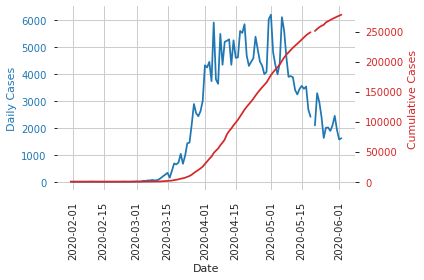

In [15]:
# Daily & Cumulative cases on different axis
# Import Data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_excel('/home/oddbod30/Files/COVID19.xlsx', sheet_name='UK Cases')

x = df['Date']; y = df['Daily Cases']; z = df['Cumulative Cases']; 

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Cases', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('Cumulative Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Global figure properties
#plt.grid(b='on')
ax1.grid(True)


#plt.title("UK COVID19 Data")
plt.show()

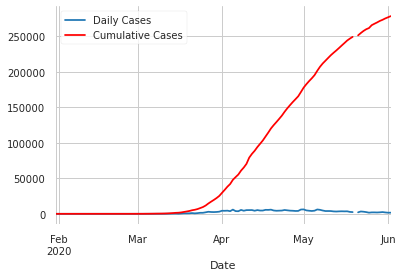

In [10]:
# Daily & Cumulative cases on different axis
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='Date',y='Daily Cases',ax=ax)
df.plot(kind='line',x='Date',y='Cumulative Cases', color='red', ax=ax)



plt.grid(b='on')
plt.show()


KeyError: 'Date'

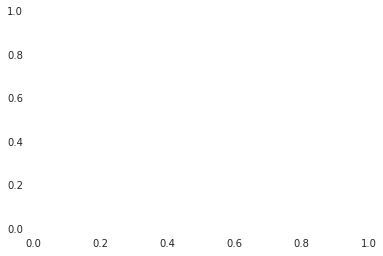

In [14]:
# Daily & 7 Day average on same axis

ax = plt.gca()
df.plot(kind='line',x='Date',y='Daily Cases',ax=ax)
df.plot(kind='line',x='Date',y='7 Day Average', color='red', ax=ax)

ax.set_ylabel("Cases")

plt.grid(b='on')
plt.show()

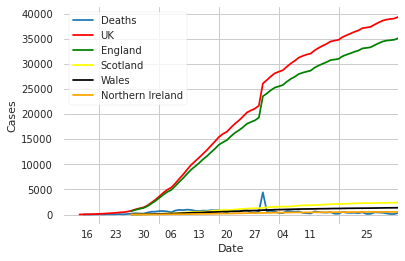

In [11]:
#Daily abs cumulative deaths by UK Nation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_excel('/home/oddbod30/Files/COVID19.xlsx', sheet_name='UK Deaths')

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='Date',y='Deaths',ax=ax)
df.plot(kind='line',x='Date',y='UK', color='red', ax=ax)
df.plot(kind='line',x='Date',y='England', color='green', ax=ax)
df.plot(kind='line',x='Date',y='Scotland', color='yellow', ax=ax)
df.plot(kind='line',x='Date',y='Wales', color='black', ax=ax)
df.plot(kind='line',x='Date',y='Northern Ireland', color='orange', ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

ax.xaxis.set_major_locator(plt.MaxNLocator(7))

plt.grid(b='on')
plt.show()

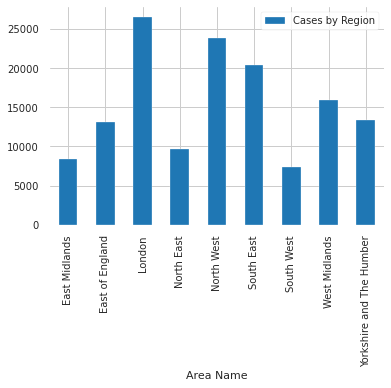

In [13]:
# Daily snapshot of Cases by Region

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_excel('/home/oddbod30/Files/COVID19.xlsx', sheet_name='NHS Regions')

# gca stands for 'get current axis'
ax = plt.gca()

#df.head(8)

df.plot(kind='bar',x='Area Name',y='Cases by Region',ax=ax)


plt.grid(b='on')
plt.xticks(rotation=90)

plt.show()